In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
import pandas as pd
import chardet


with open('/content/Super_Store_data.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [3]:
df = pd.read_csv('/content/Super_Store_data.csv', encoding=encoding)

In [4]:
df.shape

(2121, 21)

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [47]:
df["Ship Mode"].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [48]:
df["Segment"].unique()

array(['Home Office', 'Consumer', 'Corporate'], dtype=object)

In [49]:
df["Category"].unique()

array(['Furniture'], dtype=object)

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df.sort_values('Order Date', inplace=True)

In [8]:
df.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
631,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1617,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1618,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df['Od_Year'] = df['Order Date'].dt.year
df['od_Month'] = df['Order Date'].dt.month
df['od_Day'] = df['Order Date'].dt.day

In [10]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Od_Year,od_Month,od_Day
1577,7475,CA-2014-167199,2014-01-06,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,2014,1,6
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,2014,1,7
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,2014,1,10
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,2014,1,11
631,2979,CA-2014-109232,2014-01-13,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,2014,1,13


In [11]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
df.sort_values('Ship Date', inplace=True)

In [13]:
df['sh_Year'] = df['Ship Date'].dt.year
df['sh_Month'] = df['Ship Date'].dt.month
df['sh_Day'] = df['Ship Date'].dt.day

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Od_Year,od_Month,od_Day,sh_Year,sh_Month,sh_Day
1577,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,2573.820,9,0.0,746.4078,2014,1,6,2014,1,10
1626,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,76.728,3,0.6,-53.7096,2014,1,7,2014,1,12
150,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,9.940,2,0.0,3.0814,2014,1,11,2014,1,14
181,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,51.940,1,0.0,21.2954,2014,1,10,2014,1,15
1355,6475,CA-2014-149524,2014-01-14,2014-01-15,First Class,BS-11590,Brendan Sweed,Corporate,United States,Philadelphia,...,61.960,4,0.5,-53.2856,2014,1,14,2014,1,15


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 1577 to 1057
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 non

In [16]:
print(df.describe())

            Row ID                     Order Date  \
count  2121.000000                           2121   
mean   5041.643564  2016-04-30 03:54:13.748231680   
min       1.000000            2014-01-06 00:00:00   
25%    2568.000000            2015-05-26 00:00:00   
50%    5145.000000            2016-06-20 00:00:00   
75%    7534.000000            2017-05-14 00:00:00   
max    9991.000000            2017-12-30 00:00:00   
std    2885.740258                            NaN   

                           Ship Date   Postal Code        Sales     Quantity  \
count                           2121   2121.000000  2121.000000  2121.000000   
mean   2016-05-04 01:54:44.299858432  55726.556341   349.834887     3.785007   
min              2014-01-10 00:00:00   1040.000000     1.892000     1.000000   
25%              2015-05-31 00:00:00  22801.000000    47.040000     2.000000   
50%              2016-06-23 00:00:00  60505.000000   182.220000     3.000000   
75%              2017-05-18 00:00:00  9003

In [17]:
print("Number of duplicate rows before removal:", df.duplicated().sum())

Number of duplicate rows before removal: 0


In [18]:
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'State', 'Postal Code', 'Product ID', 'Product Name']
df_cleaned = df.drop(columns=columns_to_drop)


In [19]:
df_cleaned.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Od_Year,od_Month,od_Day,sh_Year,sh_Month,sh_Day
1577,2014-01-06,2014-01-10,Standard Class,Home Office,United States,Henderson,South,Furniture,Chairs,2573.820,9,0.0,746.4078,2014,1,6,2014,1,10
1626,2014-01-07,2014-01-12,Standard Class,Consumer,United States,Huntsville,Central,Furniture,Furnishings,76.728,3,0.6,-53.7096,2014,1,7,2014,1,12
150,2014-01-11,2014-01-14,First Class,Consumer,United States,Dover,East,Furniture,Furnishings,9.940,2,0.0,3.0814,2014,1,11,2014,1,14
181,2014-01-10,2014-01-15,Standard Class,Corporate,United States,Springfield,South,Furniture,Furnishings,51.940,1,0.0,21.2954,2014,1,10,2014,1,15
1355,2014-01-14,2014-01-15,First Class,Corporate,United States,Philadelphia,East,Furniture,Bookcases,61.960,4,0.5,-53.2856,2014,1,14,2014,1,15


In [20]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 1577 to 1057
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    2121 non-null   datetime64[ns]
 1   Ship Date     2121 non-null   datetime64[ns]
 2   Ship Mode     2121 non-null   object        
 3   Segment       2121 non-null   object        
 4   Country       2121 non-null   object        
 5   City          2121 non-null   object        
 6   Region        2121 non-null   object        
 7   Category      2121 non-null   object        
 8   Sub-Category  2121 non-null   object        
 9   Sales         2121 non-null   float64       
 10  Quantity      2121 non-null   int64         
 11  Discount      2121 non-null   float64       
 12  Profit        2121 non-null   float64       
 13  Od_Year       2121 non-null   int32         
 14  od_Month      2121 non-null   int32         
 15  od_Day        2121 non-null   int32     

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_numerical = df_cleaned.copy()
for column in df_numerical.columns:
    if df_numerical[column].dtype == 'object':
        df_numerical[column] = label_encoder.fit_transform(df_numerical[column])


In [22]:
df_numerical.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Od_Year,od_Month,od_Day,sh_Year,sh_Month,sh_Day
1577,2014-01-06,2014-01-10,3,2,0,137,2,0,1,2573.820,9,0.0,746.4078,2014,1,6,2014,1,10
1626,2014-01-07,2014-01-12,3,0,0,147,0,0,2,76.728,3,0.6,-53.7096,2014,1,7,2014,1,12
150,2014-01-11,2014-01-14,0,0,0,88,1,0,2,9.940,2,0.0,3.0814,2014,1,11,2014,1,14
181,2014-01-10,2014-01-15,3,1,0,323,2,0,2,51.940,1,0.0,21.2954,2014,1,10,2014,1,15
1355,2014-01-14,2014-01-15,0,1,0,264,1,0,0,61.960,4,0.5,-53.2856,2014,1,14,2014,1,15


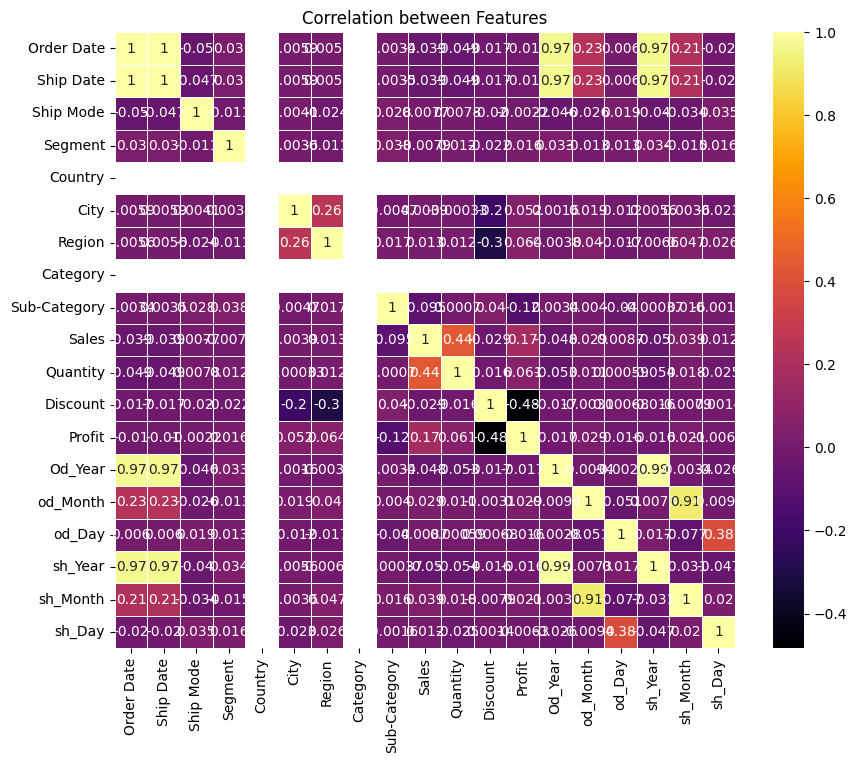

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='inferno', linewidths=.5)
plt.title("Correlation between Features")
plt.show()

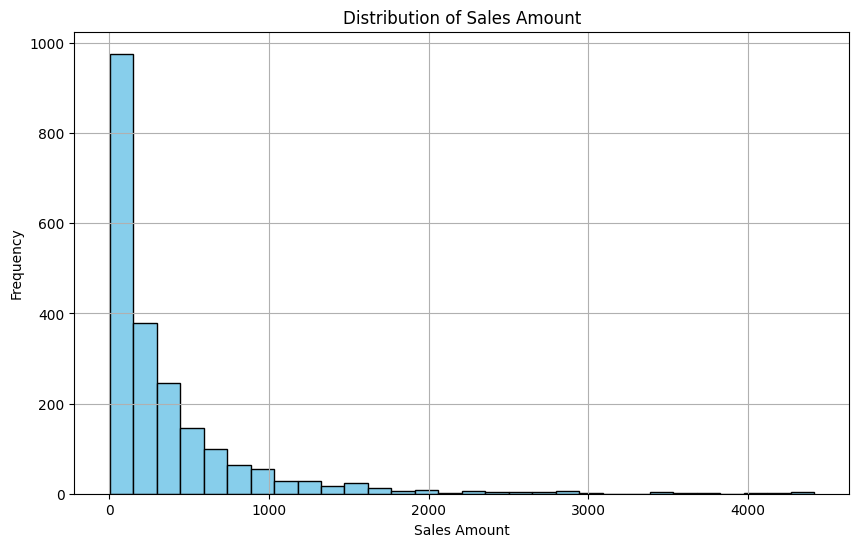

In [24]:
import matplotlib.pyplot as plt

# Plot histogram of the 'Sales' column
plt.figure(figsize=(10, 6))
plt.hist(df_numerical['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Amount')
plt.grid(True)
plt.show()


In [25]:
# Define the DataFrame df_imp
df_imp = df_numerical.copy()

# Extracting date-related features from Order Date
df_imp['OrderDayOfWeek'] = df_imp['Order Date'].dt.dayofweek
df_imp['OrderMonth'] = df_imp['Order Date'].dt.month
df_imp['OrderYear'] = df_imp['Order Date'].dt.year

# Extracting date-related features from Ship Date
df_imp['ShipDayOfWeek'] = df_imp['Ship Date'].dt.dayofweek
df_imp['ShipMonth'] = df_imp['Ship Date'].dt.month
df_imp['ShipYear'] = df_imp['Ship Date'].dt.year

# Display the first few rows of the DataFrame with the new date-related features
print(df_imp.head())


     Order Date  Ship Date  Ship Mode  Segment  Country  City  Region  \
1577 2014-01-06 2014-01-10          3        2        0   137       2   
1626 2014-01-07 2014-01-12          3        0        0   147       0   
150  2014-01-11 2014-01-14          0        0        0    88       1   
181  2014-01-10 2014-01-15          3        1        0   323       2   
1355 2014-01-14 2014-01-15          0        1        0   264       1   

      Category  Sub-Category     Sales  ...  od_Day  sh_Year  sh_Month  \
1577         0             1  2573.820  ...       6     2014         1   
1626         0             2    76.728  ...       7     2014         1   
150          0             2     9.940  ...      11     2014         1   
181          0             2    51.940  ...      10     2014         1   
1355         0             0    61.960  ...      14     2014         1   

      sh_Day  OrderDayOfWeek  OrderMonth  OrderYear  ShipDayOfWeek  ShipMonth  \
1577      10               0       

In [26]:
df_imp.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Od_Year', 'od_Month', 'od_Day', 'sh_Year', 'sh_Month',
       'sh_Day', 'OrderDayOfWeek', 'OrderMonth', 'OrderYear', 'ShipDayOfWeek',
       'ShipMonth', 'ShipYear'],
      dtype='object')

In [27]:
# Define the desired column order
desired_columns = [
    'Order Date','Ship Date','OrderYear', 'OrderMonth', 'OrderDay', 'OrderDayOfWeek',
    'ShipYear', 'ShipMonth', 'ShipDay', 'ShipDayOfWeek',
    'Ship Mode', 'Segment', 'Country', 'City', 'Region', 'Category', 'Sub-Category',
    'Sales', 'Quantity', 'Discount', 'Profit'
]

# Reorder the columns
df_imp = df_imp.reindex(columns=desired_columns)

In [28]:
df_imp.reset_index(inplace=True)

In [29]:
df_imp.drop(columns=['OrderDay','ShipDay'], inplace=True)


In [30]:
df_imp.head()

,index,Order Date,Ship Date,OrderYear,OrderMonth,OrderDayOfWeek,ShipYear,ShipMonth,ShipDayOfWeek,Ship Mode,Segment,Country,City,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1577,2014-01-06,2014-01-10,2014,1,0,2014,1,4,3,2,0,137,2,0,1,2573.820,9,0.0,746.4078
1,1626,2014-01-07,2014-01-12,2014,1,1,2014,1,6,3,0,0,147,0,0,2,76.728,3,0.6,-53.7096
2,150,2014-01-11,2014-01-14,2014,1,5,2014,1,1,0,0,0,88,1,0,2,9.940,2,0.0,3.0814
3,181,2014-01-10,2014-01-15,2014,1,4,2014,1,2,3,1,0,323,2,0,2,51.940,1,0.0,21.2954
4,1355,2014-01-14,2014-01-15,2014,1,1,2014,1,2,0,1,0,264,1,0,0,61.960,4,0.5,-53.2856


<Figure size 1500x600 with 0 Axes>

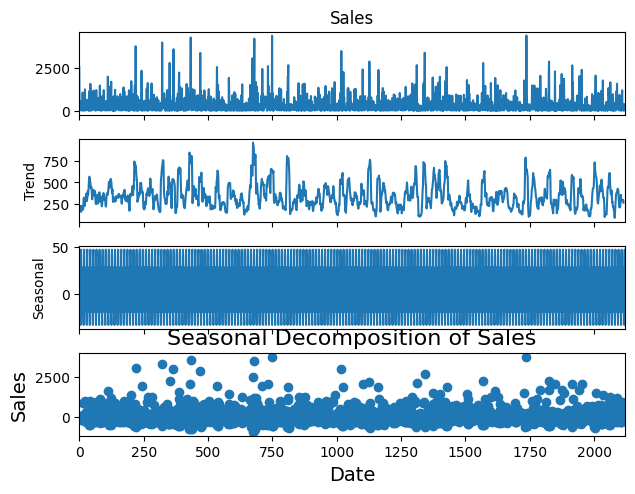

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

sales_series = df_imp['Sales']

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_series, model='additive', period=12)

plt.figure(figsize=(15, 6))

# Plot the decomposed components
fig = decomposition.plot()


plt.title('Seasonal Decomposition of Sales', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Show the plot
plt.show()


In [32]:
df_columns_drop = ["index", "Order Date", "Ship Date", "Ship Mode", "Segment", "Country", "City", "Region"]

df_imp.drop(df_columns_drop, axis=1, inplace=True)

In [33]:
df_imp.head()

,OrderYear,OrderMonth,OrderDayOfWeek,ShipYear,ShipMonth,ShipDayOfWeek,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2014,1,0,2014,1,4,0,1,2573.820,9,0.0,746.4078
1,2014,1,1,2014,1,6,0,2,76.728,3,0.6,-53.7096
2,2014,1,5,2014,1,1,0,2,9.940,2,0.0,3.0814
3,2014,1,4,2014,1,2,0,2,51.940,1,0.0,21.2954
4,2014,1,1,2014,1,2,0,0,61.960,4,0.5,-53.2856


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the numeric features
numeric_features = ['OrderYear', 'OrderMonth', 'OrderDayOfWeek', 'ShipYear', 'ShipMonth', 'ShipDayOfWeek', 'Quantity', 'Discount', 'Profit']

# Define the categorical features
categorical_features = []

# Define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [35]:
X = df_imp.drop('Sales', axis=1)
y = df_imp['Sales']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Define the models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
}

In [42]:
# Create pipelines for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', model)])

Decision Tree:
  Mean Squared Error: 97697.9708392125
  Mean Absolute Error: 156.4620896470588
  R-squared Error: 0.6656948751591327




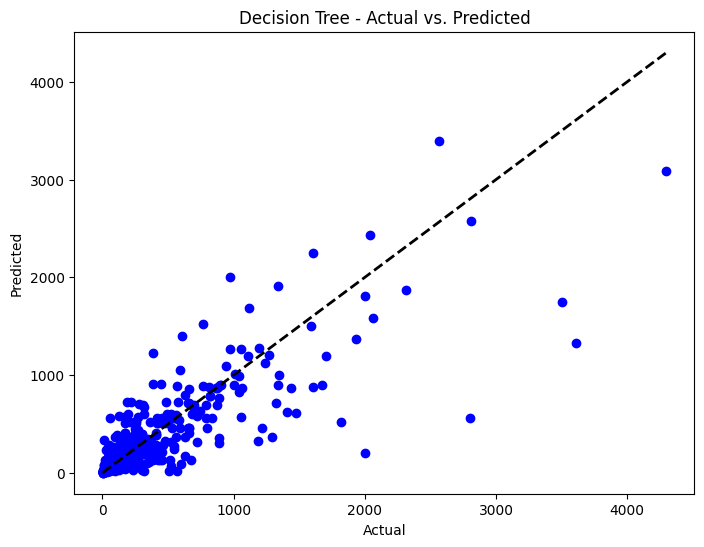

Random Forest:
  Mean Squared Error: 82798.32552055913
  Mean Absolute Error: 142.64614636941178
  R-squared Error: 0.716678818280476




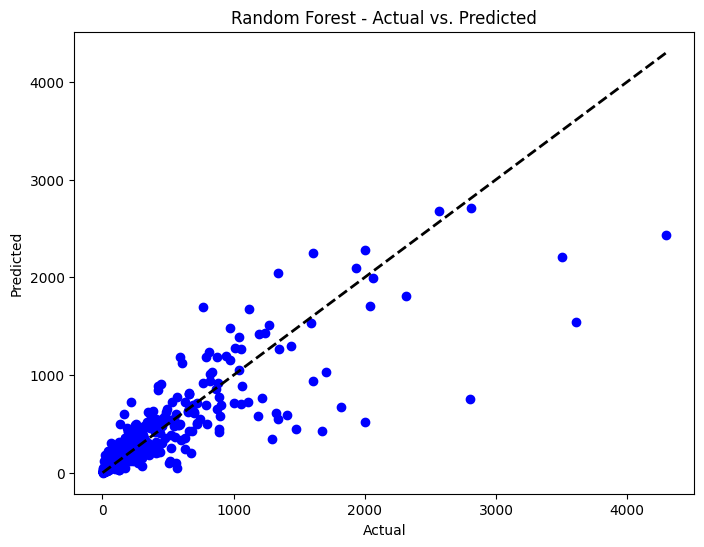

Gradient Boosting:
  Mean Squared Error: 78023.95851454414
  Mean Absolute Error: 143.6808416884577
  R-squared Error: 0.7330158552145261




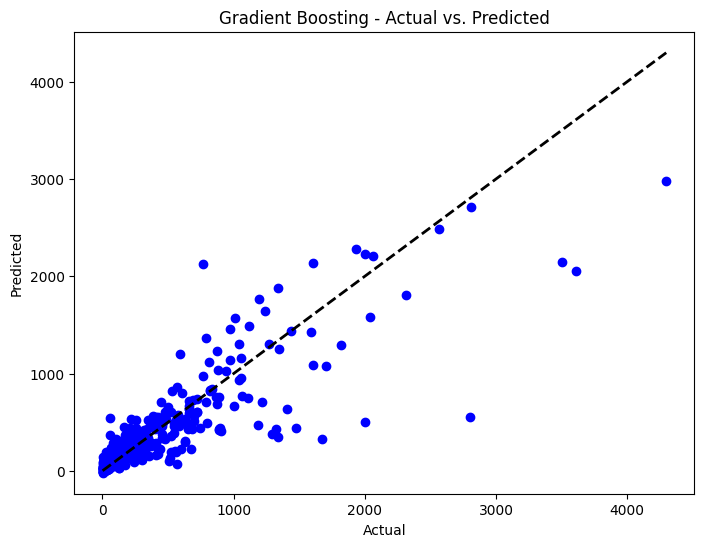

K-Nearest Neighbors:
  Mean Squared Error: 137939.69162951806
  Mean Absolute Error: 208.72375741176472
  R-squared Error: 0.5279948453933676




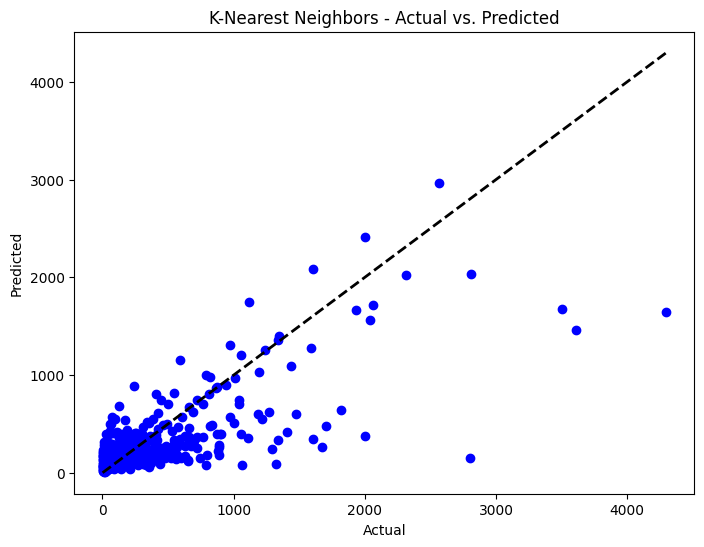

In [43]:
# Train and evaluate models
model_names = []
r2_scores = []
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    r2_scores.append(r2)
    print(f"{name}:")
    print("  Mean Squared Error:", mse)
    print("  Mean Absolute Error:", mae)
    print("  R-squared Error:", r2)
    print("\n")

    # Visualize actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs. Predicted')
    plt.show()

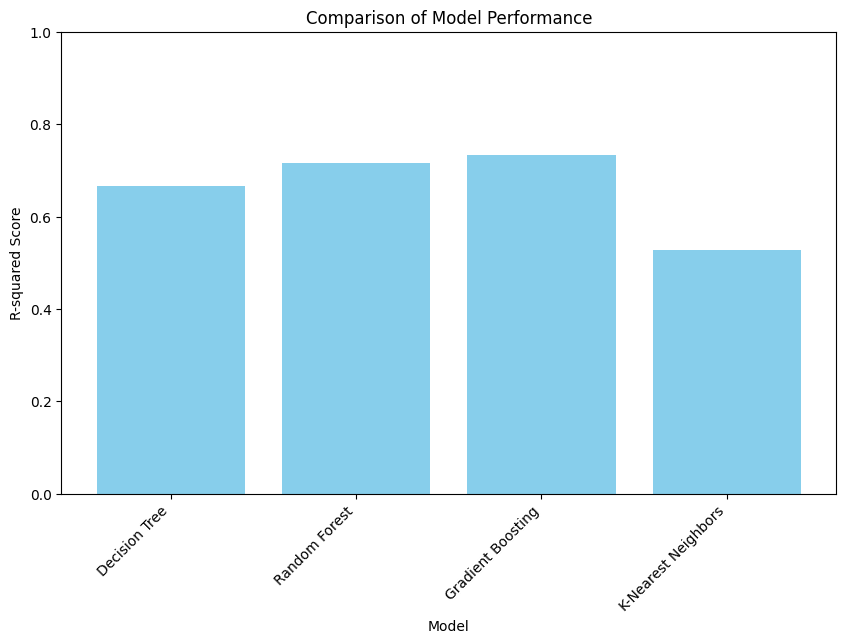

In [44]:
import matplotlib.pyplot as plt

# Plotting the R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()
